<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Customer_SegmentationK_means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Mall Customer Segmentation through K-means Clustering

Aspiring to understand customer behavior and preferences within a mall setting, our objective is to leverage clustering techniques, specifically K-means, to segment mall customers effectively. Through this project, we seek to gain hands-on experience in clustering techniques while delivering actionable insights for improving mall operations and customer satisfaction.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.shape

(250, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [41]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## EDA

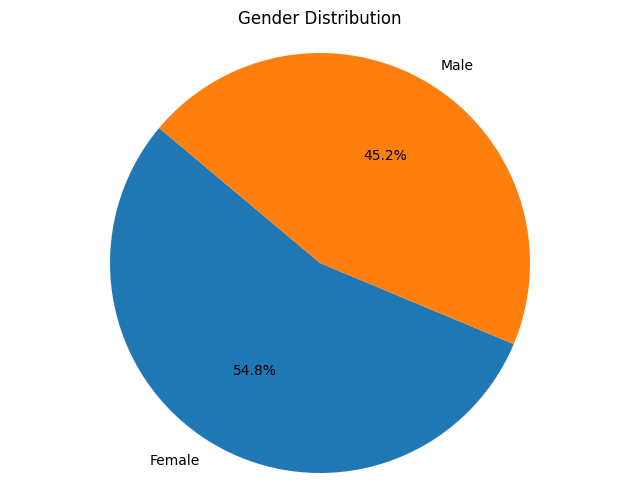

In [42]:
gender_counts = df['Gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

How does the relationship between age, annual income, and spending score vary between males and females?

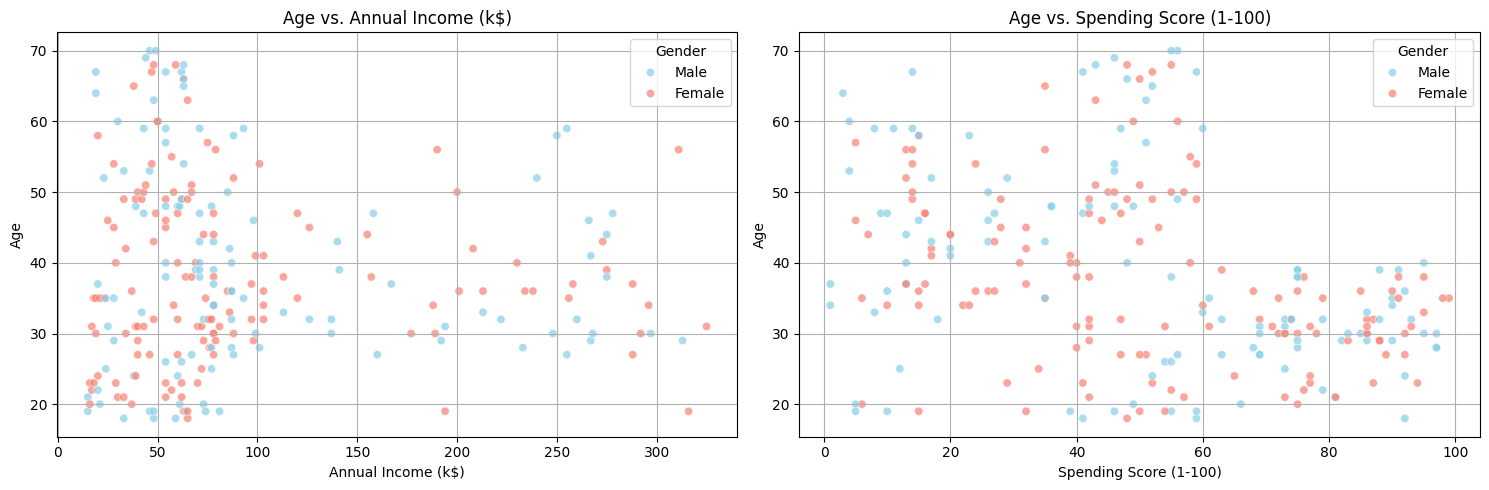

In [43]:

plt.figure(figsize=(15, 5))

# Scatter plot of Age vs. Annual Income (k$)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender', palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Age vs. Annual Income (k$)')
plt.ylabel('Age')
plt.xlabel('Annual Income (k$)')
plt.grid(True)

# Scatter plot of Age vs. Spending Score (1-100)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender', palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Age vs. Spending Score (1-100)')
plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')
plt.grid(True)

plt.tight_layout()
plt.show()


Insight:Looks like most of our customers are keeping it real with lower income levels, and we've got a nice mix of genders in the income pool. Age-wise, there's no clear age-income connection, but hey, if you're swimming in cash, chances are you're rocking your 30s and 40s. Money talks, but age? Not so much in this income game!

Seems like once you hit the big **40**, your spending mojo takes a chill pill. Folks aged 40 and above are keeping their wallets snug, with spending scores leveling off around 60. Looks like the younger crowd is still living their best 'treat yourself' life, while the seasoned veterans are opting for the 'save for a rainy day' approach

Distribution of Spending score and Annual Income by Gender?

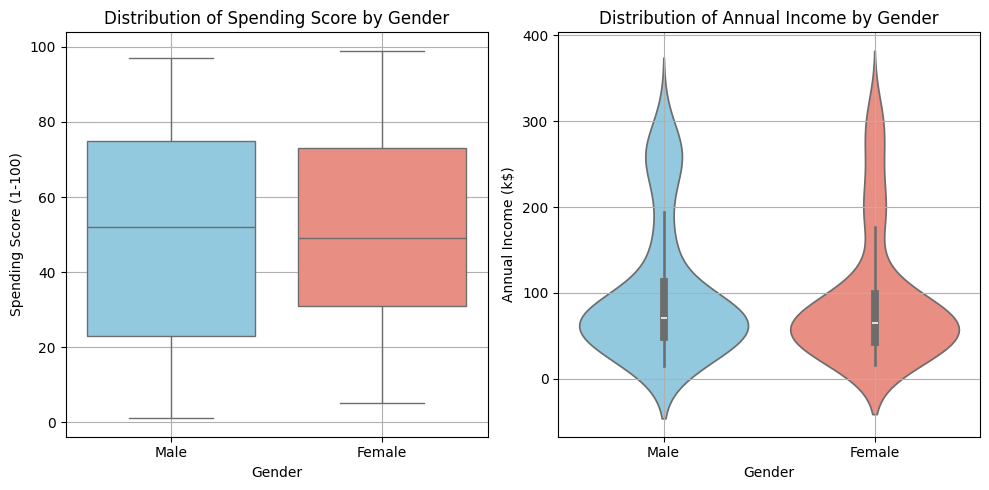

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# and 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)' are the columns of interest

plt.figure(figsize=(10, 5))

# Box plot for Spending Score by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Spending Score (1-100)',hue='Gender', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

# Box plot for Annual Income by Gender
plt.subplot(1, 2, 2)
sns.violinplot(x='Gender', y='Annual Income (k$)',hue='Gender',  data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.grid(True)

plt.tight_layout()
plt.show()


Looks like when it comes to spending, the ladies are reaching for the stars with their spending scores, while keeping things cozy in the middle. Meanwhile, the guys are sticking to their spending comfort zone, not straying too far from the median. But hey, whether you're a spender or a saver, seems like we're all just here for a good time at the checkout!

Looks like in the annual income symphony, the guys are hitting those high notes! Males are showing up with a higher density at the big bucks end compared to the ladies.

In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


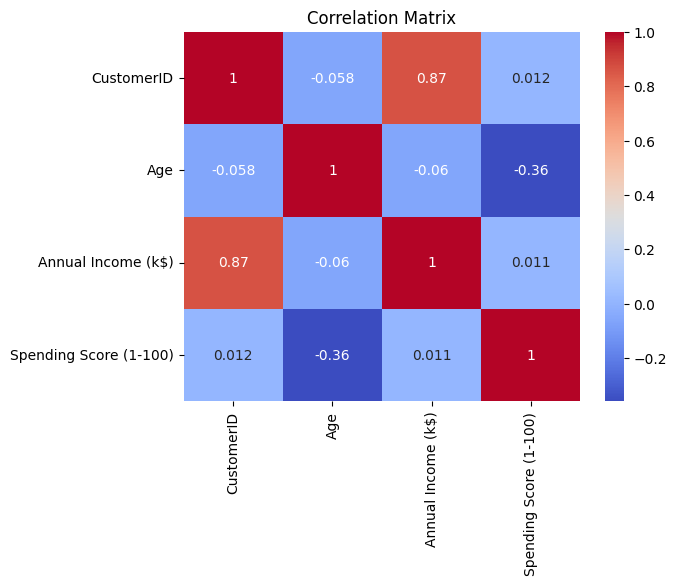

In [46]:
# Calculate the correlation matrix
corr = df.corr(numeric_only = True)

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()


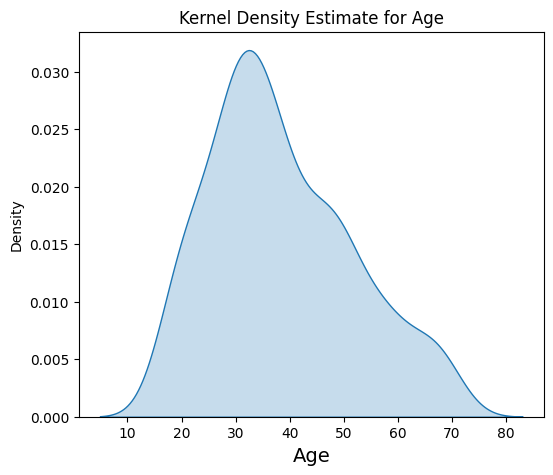

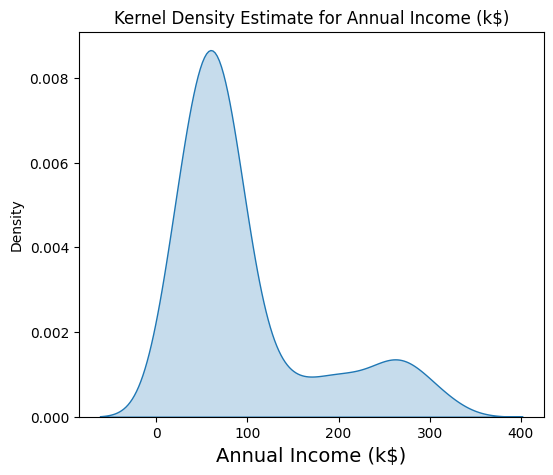

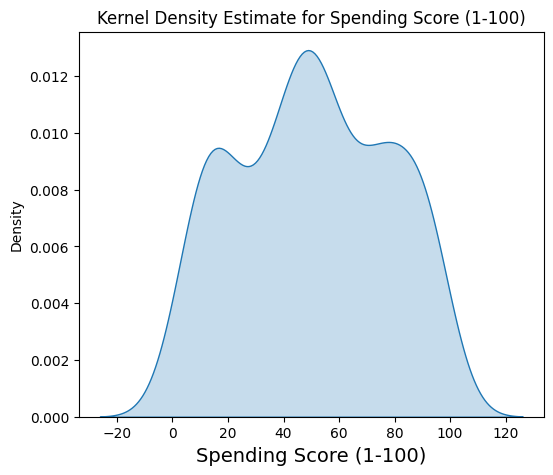

In [47]:
numerical_cols =['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


# Create subplots for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(6, 5))  # Set the figure size
    sns.kdeplot(data=df[col], fill=True)  # Plot the KDE
    plt.title(f'Kernel Density Estimate for {col}')  # Add title
    plt.xlabel(col, fontsize=14)  # Add x-axis label
    plt.ylabel('Density')  # Add y-axis label
    plt.show()  # Show the plot


MODEL BUILDING

Define features

In [48]:
X= df.iloc[:,[3,4]].values

Identify optimal k for the model using elbow method.

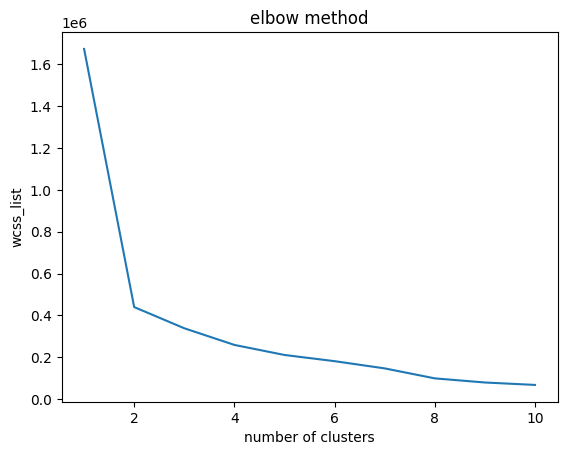

In [49]:
from enum import auto
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init = 'auto',  random_state=42 )
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.xlabel('number of clusters')
plt.ylabel('wcss_list')
plt.title("elbow method")
plt.show()

We will choose the optimal value of k is 5 to find a balance between capturing meaningful clusters and avoiding over-segmentation.

In [50]:
kmeansmodel = KMeans(n_clusters=5, n_init = "auto",  random_state=0 )
y_predict = kmeansmodel.fit_predict(X)

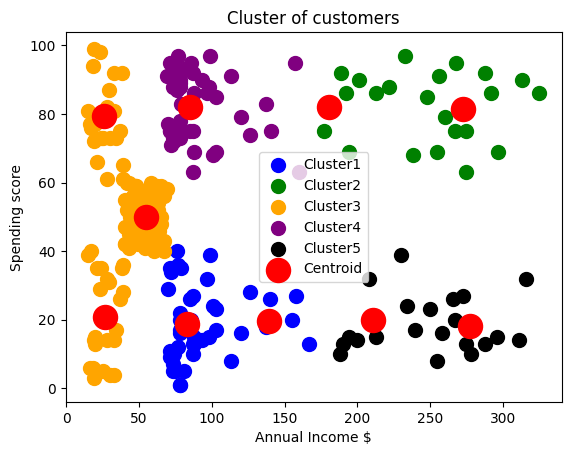

In [51]:
plt.scatter(X[y_predict == 0, 0], X[y_predict==0, 1],s=100, c= 'blue', label ="Cluster1")
plt.scatter(X[y_predict == 1, 0], X[y_predict==1, 1],s=100, c= 'green', label ="Cluster2")
plt.scatter(X[y_predict == 2, 0], X[y_predict==2, 1],s=100, c= 'orange', label ="Cluster3")
plt.scatter(X[y_predict == 3, 0], X[y_predict==3, 1],s=100, c= 'purple', label ="Cluster4")
plt.scatter(X[y_predict == 4, 0], X[y_predict==4, 1],s=100, c= 'black', label ="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroid')
plt.xlabel('Annual Income $')
plt.ylabel('Spending score')
plt.title('Cluster of customers')
plt.legend()
plt.show()

Cluster 3 stands out as having the lowest annual income, yet it encompasses the entire spending score spectrum, with the majority falling within the mid-range spending scores of 40-60. In contrast, the clusters with higher annual incomes exhibit a stark divide: some customers display high spending scores while others show low spending scores, with little to no presence in the middle ground.